In [427]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [428]:
pd.set_option('display.max_columns',None)

In [429]:
df=pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [430]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
0,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5,3,2,2.0,East,Old Property,NaN,477.0,NaN,0,0,0,0,0,0,8
1,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3,3,3,1.0,South,Moderately Old,NaN,2250.0,NaN,0,0,0,0,0,0,30
2,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,4,3+,5.0,North-East,Relatively New,2690.0,2350.0,2170.0,1,0,0,0,0,0,220
3,house,independent,sector 25,NaN,NaN,NaN,Plot area 250(209.03 sq.m.)Built Up area: 260 ...,12,12,3+,4.0,North-East,New Property,NaN,260.0,245.0,1,1,1,0,1,1,157
4,house,dlf city plots phase 3,sector 24,1.44,26667.0,540.0,Plot area 60(50.17 sq.m.),4,2,2,1.0,NaN,Old Property,NaN,540.0,NaN,0,0,0,0,0,0,8


In [431]:
df.shape

(3677, 23)

In [432]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'servant room', 'study room', 'pooja room', 'store room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\3227353429.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

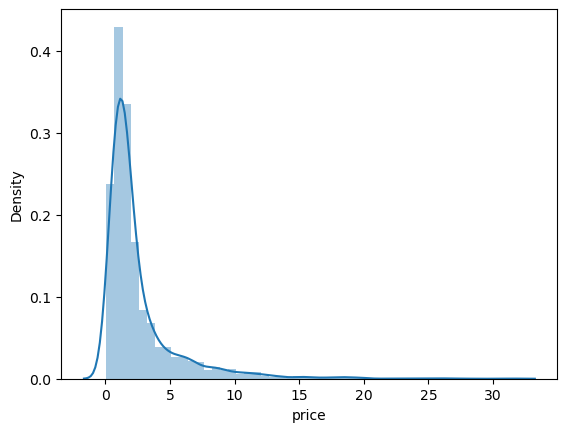

In [433]:
# outliers on the basis of the price column
sns.distplot(df['price'])
# its not normal distribution 

<Axes: xlabel='price'>

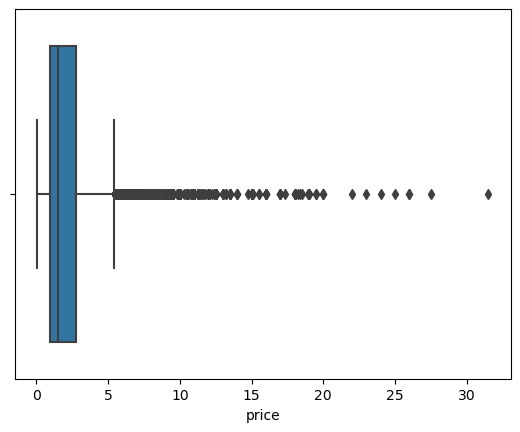

In [434]:
sns.boxplot(x=df['price'])

In [435]:
# Calculate the IQR for the price column 

Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

# identifying outliers :

outliers=df[(df['price']>upper_bound) | (df['price']<lower_bound)  ]

# displaying the number of outliers and some statistics
num_outliers=outliers.shape[0]
outliers_price_stats=outliers['price'].describe()
num_outliers,outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [436]:
outliers.sort_values('price',ascending=False).head(30)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
1720,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,1,96
2413,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,1,0,1,2,49
3564,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,79
3356,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,1,0,1,2,158
2410,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
3015,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,1,0,0,2,144
394,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,178
958,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,1,0,0,0,0,0,67
1318,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,1,0,0,0,0,2,31
1363,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,180


In [437]:

# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

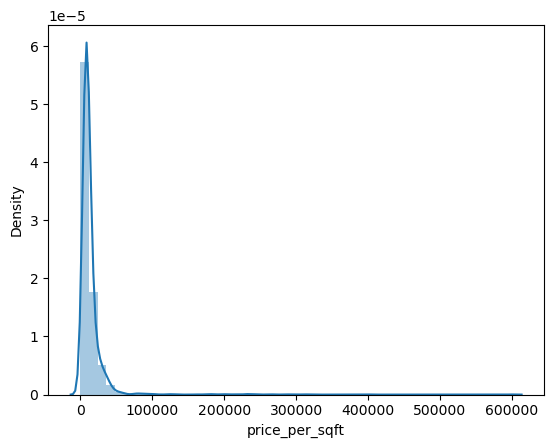

In [438]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

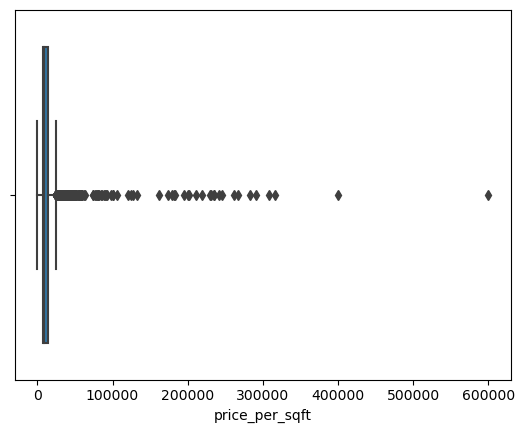

In [439]:
sns.boxplot(x=df['price_per_sqft'])

In [440]:
# calculate the iqr column for the price column 
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)
IQR=Q3-Q1

# define bounds for outliers 
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

# identify outliers :

outliers_sqft=df[ (df['price_per_sqft']>upper_bound) | (df['price_per_sqft']<lower_bound) ]

# display no. outliers and stats
num_outliers=outliers_sqft.shape[0]
outliers_sqft_stats=outliers_sqft['price_per_sqft'].describe()
num_outliers,outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [441]:
# we didnt converted the sq yard to sqft so due to that price_per_sqft gave more number so converting area to sqft ie multiply by  9 and than divide will give correct ans for price per sqft 

outliers_sqft['area']=outliers_sqft['area'].apply(lambda x : x*9 if x<1000 else x )

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\1691387960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area']=outliers_sqft['area'].apply(lambda x : x*9 if x<1000 else x )


In [442]:
outliers_sqft['price_per_sqft']=round((outliers_sqft['price']*10000000)/outliers_sqft['area'] )

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\4059716328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft']=round((outliers_sqft['price']*10000000)/outliers_sqft['area'] )


In [443]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [444]:
df.update(outliers_sqft)

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

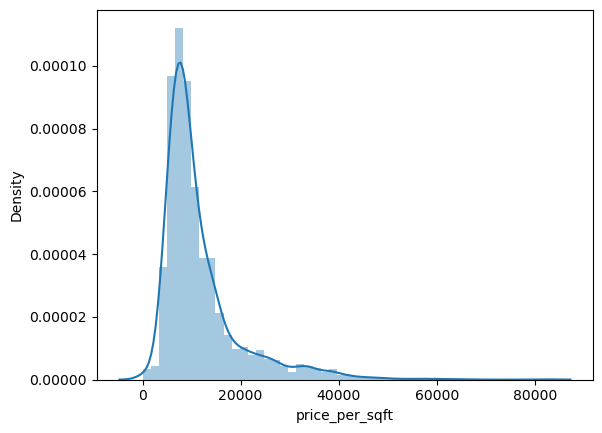

In [445]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

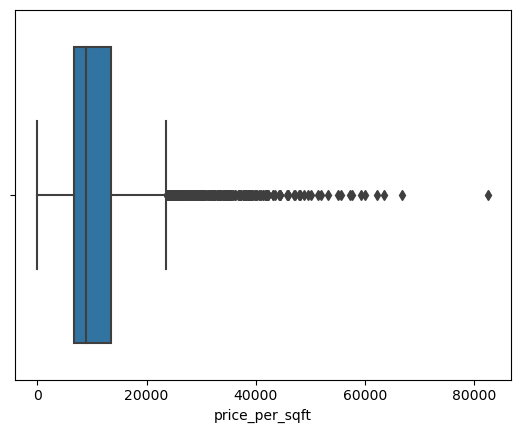

In [446]:
sns.boxplot(x=df['price_per_sqft'])

In [447]:
df[df['price_per_sqft']>50000] 
# only 13 values so consider them outliers and remove them 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
506,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,132.0
797,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.0,300.0,1.0,1.0,1.0,1.0,0.0,1.0,79.0
1272,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,180.0
1532,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1.0,1.0,1.0,1.0,0.0,2.0,125.0
2143,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,170.0
2692,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1.0,1.0,1.0,0.0,0.0,1.0,102.0
3015,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1.0,1.0,1.0,0.0,0.0,2.0,144.0
3356,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1.0,1.0,1.0,0.0,1.0,2.0,158.0


In [448]:
df=df[df['price_per_sqft']<=50000]

<Axes: xlabel='price_per_sqft'>

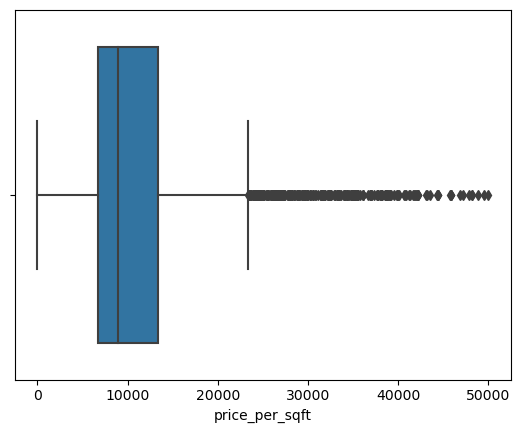

In [449]:
sns.boxplot(x=df['price_per_sqft'])

### area

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

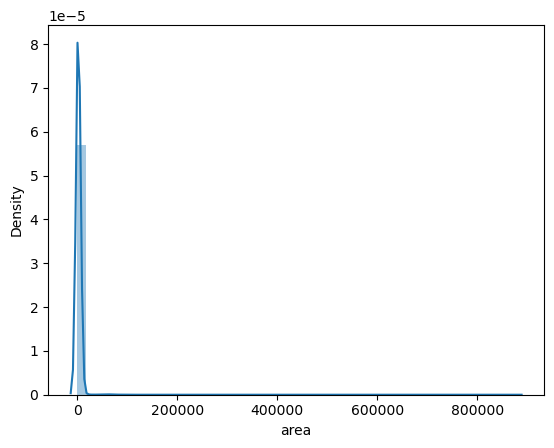

In [450]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

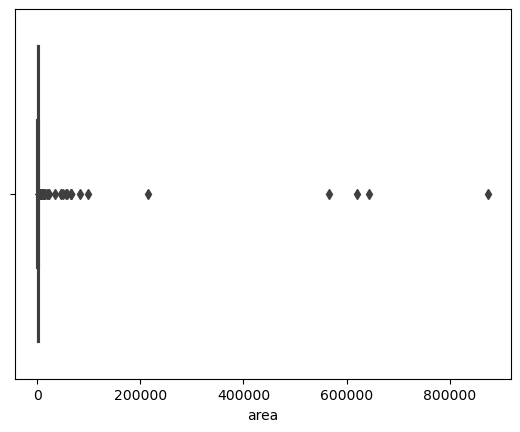

In [451]:
sns.boxplot(x=df['area'])

In [452]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [453]:
df[df['area']>100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
2355,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,51.0
2840,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,0.0,1.0,0.0,0.0,1.0,0.0,78.0
3464,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0
3509,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1.0,1.0,1.0,0.0,1.0,2.0,0.0
3546,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0


In [454]:
df=df[df['area']<100000]

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

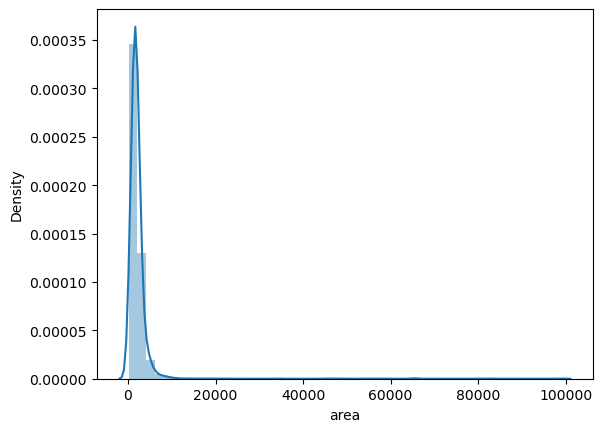

In [455]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

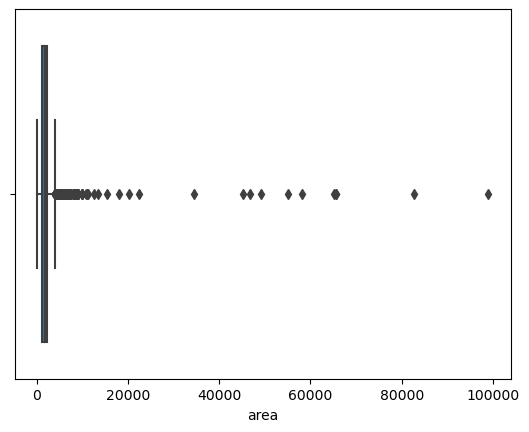

In [456]:
sns.boxplot(x=df['area'])

In [457]:
df[df['area']>10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
1015,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,1.0,0.0,1.0,1.0,0.0,2.0,60.0
844,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,14.0
1675,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,0.0,1.0,0.0,0.0,0.0,0.0,22.0
1202,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,64.0
92,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1968,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3796,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,44.0
2376,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,0.0,1.0,0.0,0.0,0.0,0.0,44.0
3335,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,1.0,0.0,0.0,1.0,0.0,2.0,129.0
1484,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,0.0,40.0


In [458]:
df.drop(index=[1015,2815,1202,1968,3796,2376,1484,2815,2773],inplace=True)

In [459]:
df[df['area']>10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
844,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,14.0
1675,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,0.0,1.0,0.0,0.0,0.0,0.0,22.0
92,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3335,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,1.0,0.0,0.0,1.0,0.0,2.0,129.0
620,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,1.0,0.0,0.0,0.0,0.0,2.0,68.0
1036,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1.0,1.0,1.0,0.0,1.0,2.0,143.0
1782,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,0.0,1.0,1.0,0.0,1.0,2.0,51.0
587,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,1.0,0.0,0.0,0.0,0.0,0.0,193.0
463,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0.0,0.0,0.0,0.0,0.0,0.0,69.0
2413,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,1.0,0.0,1.0,2.0,49.0


In [460]:
df.loc[	844,'area']=115*9 
df.loc[	92,'area']=7250 
df.loc[3335	,'area']=5800.0	
df.loc[620	,'area']=2660
df.loc[1036	,'area']=2850
df.loc[1782	,'area']=18122
df.loc[	587,'area']=2160
df.loc[	463,'area']=1175.11

In [461]:
df.drop(index=[1675,],inplace=True)
 

In [462]:
df[df['area']>10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
1782,flat,godrej air,sector 85,2.5,1379.0,18122.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,0.0,1.0,1.0,0.0,1.0,2.0,51.0
2413,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,1.0,0.0,1.0,2.0,49.0
2256,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0
1584,house,independent,sohna road road,5.5,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,3.0,3.0,3+,2.0,West,Moderately Old,NaN,3500.0,NaN,1.0,1.0,1.0,0.0,1.0,0.0,49.0


C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

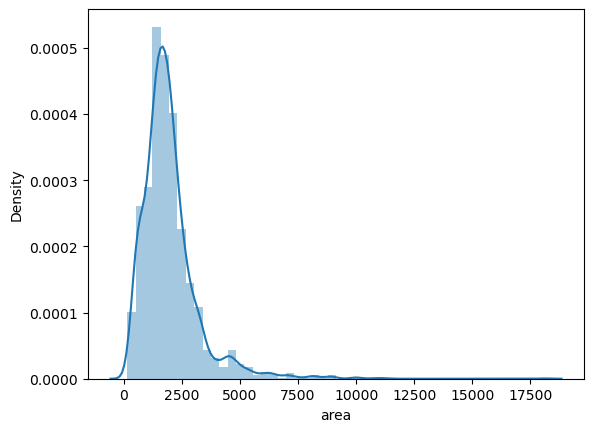

In [463]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

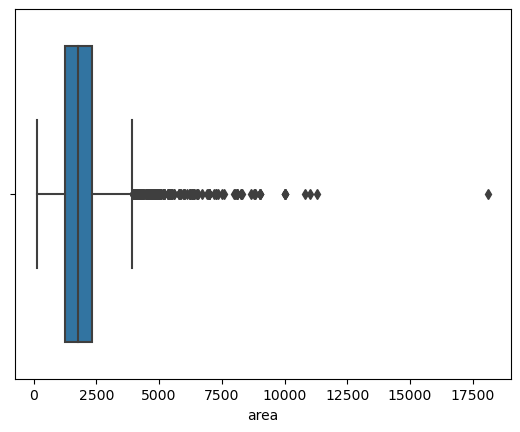

In [464]:
sns.boxplot(x=df['area'])

In [465]:
df['area'].describe()

count     3633.000000
mean      1954.846438
std       1244.959911
min        145.000000
25%       1260.000000
50%       1747.000000
75%       2329.000000
max      18122.000000
Name: area, dtype: float64

### Bedroom


C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

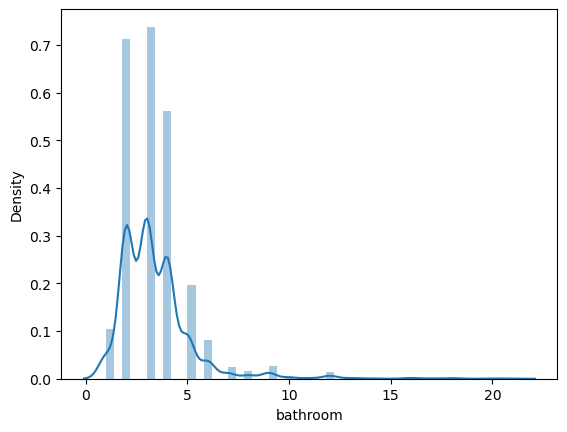

In [466]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

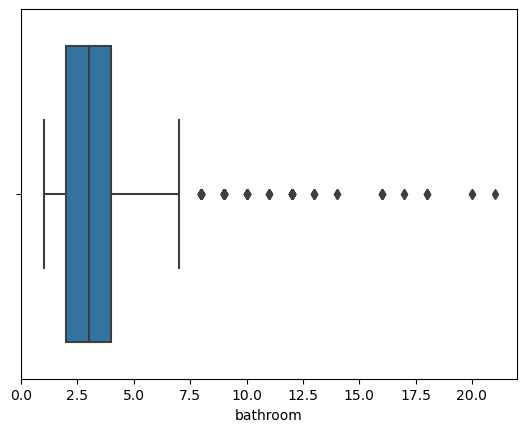

In [467]:
sns.boxplot(x=df['bathroom'])

In [468]:
df['bedRoom'].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [469]:
df[df['bedRoom']>10].sort_values('bedRoom',ascending=False).shape

(45, 23)

In [470]:
df=df[df['bedRoom']<=10]

In [471]:
df.shape

(3588, 23)

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

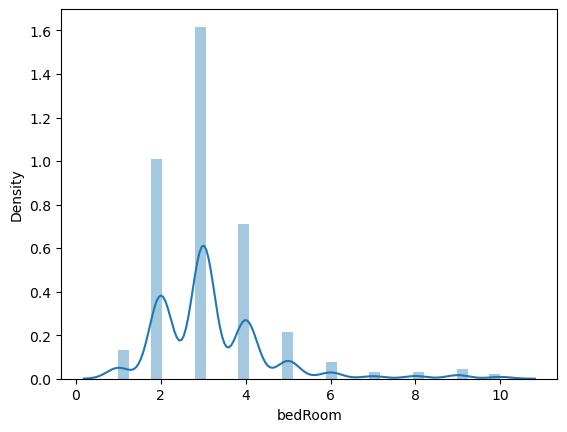

In [472]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

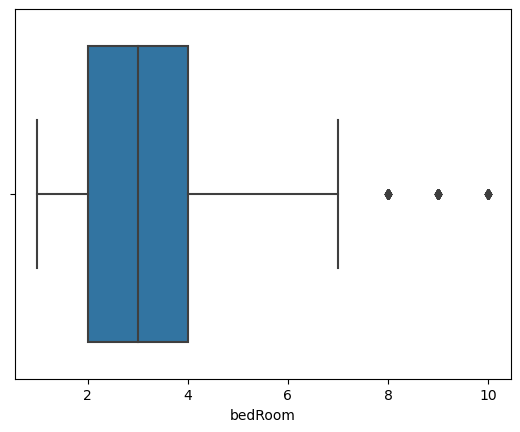

In [473]:
sns.boxplot(x=df['bedRoom'])

In [474]:
df['bedRoom'].describe()

count    3588.000000
mean        3.203735
std         1.393968
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

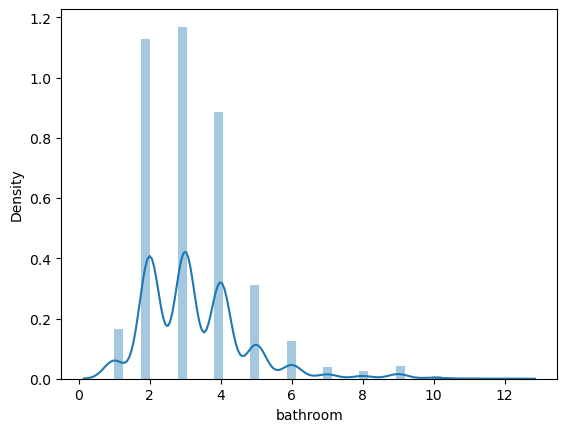

In [475]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

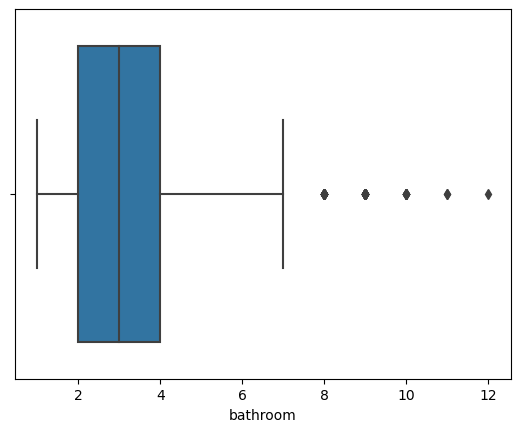

In [476]:
sns.boxplot(x=df['bathroom'])

In [477]:
df[df['bathroom']>10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
373,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,1.0,0.0,0.0,0.0,0.0,2.0,179.0
91,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,38.0
1509,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,1.0,0.0,1.0,2.0,39.0


In [478]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
0,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5.0,3.0,2,2.0,East,Old Property,NaN,477.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3.0,3.0,3,1.0,South,Moderately Old,NaN,2250.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,30.0
2,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,4.0,3+,5.0,North-East,Relatively New,2690.0,2350.0,2170.0,1.0,0.0,0.0,0.0,0.0,0.0,220.0
4,house,dlf city plots phase 3,sector 24,1.44,2963.0,4860.0,Plot area 60(50.17 sq.m.),4.0,2.0,2,1.0,NaN,Old Property,NaN,540.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0
5,house,independent,sector 4,0.65,10317.0,630.0,Plot area 70(6.5 sq.m.),1.0,1.0,1,1.0,South-East,Moderately Old,NaN,70.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,21.0


### super_built_up_area

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

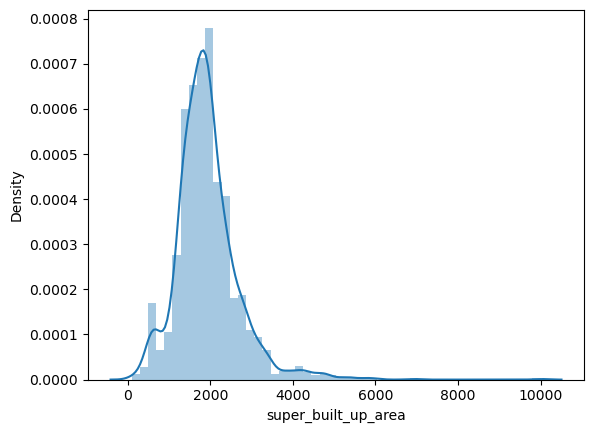

In [479]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

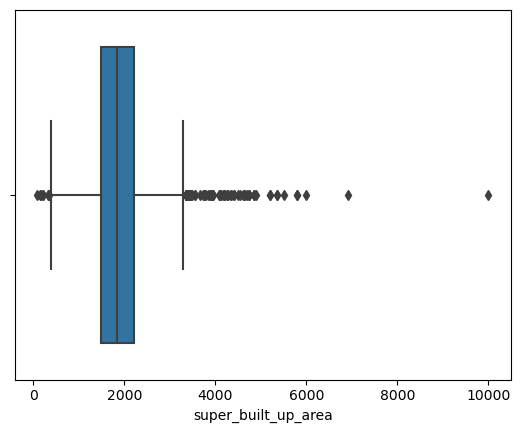

In [480]:
sns.boxplot(x=df['super_built_up_area'])

In [481]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [482]:
df[df['super_built_up_area']>6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
2185,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,56.0
3107,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,2.0,188.0


### built up area

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

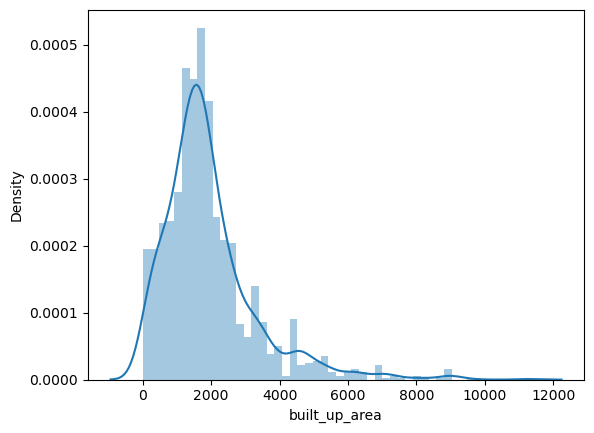

In [483]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

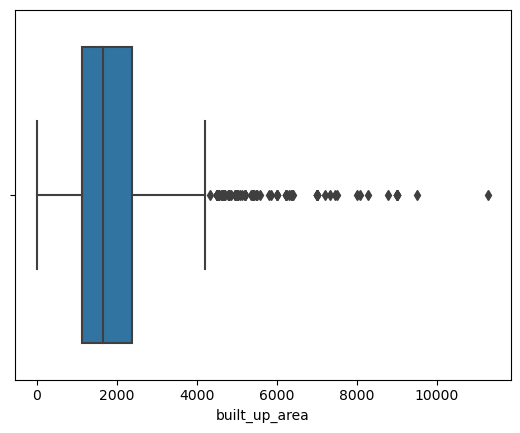

In [484]:
sns.boxplot(x=df['built_up_area'])

In [485]:
df[df['built_up_area']>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
2413,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,1.0,0.0,1.0,2.0,49.0


### carpet area

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

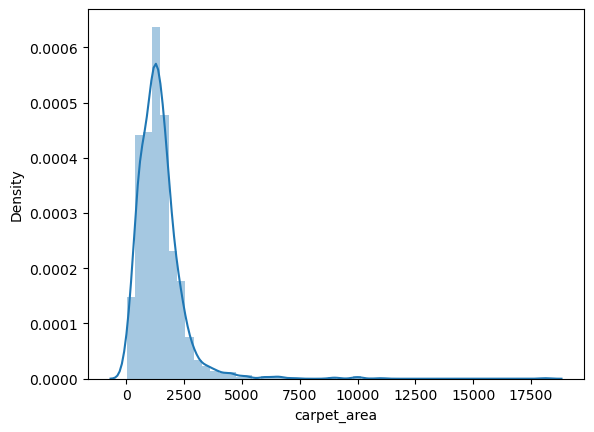

In [486]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

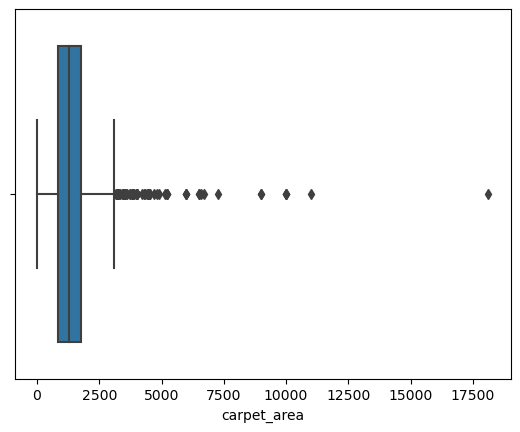

In [487]:
sns.boxplot(x=df['carpet_area'])

In [488]:
df[df['carpet_area']>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
1782,flat,godrej air,sector 85,2.5,1379.0,18122.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,0.0,1.0,1.0,0.0,1.0,2.0,51.0
2256,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0


In [489]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'servant room', 'study room', 'pooja room', 'store room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

### luxury score

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

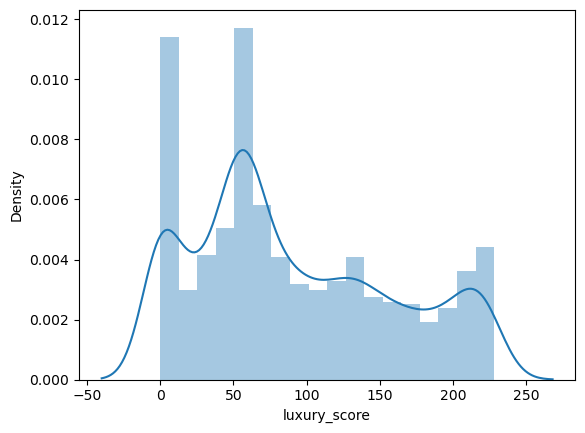

In [490]:
sns.distplot(df['luxury_score'])

<Axes: xlabel='luxury_score'>

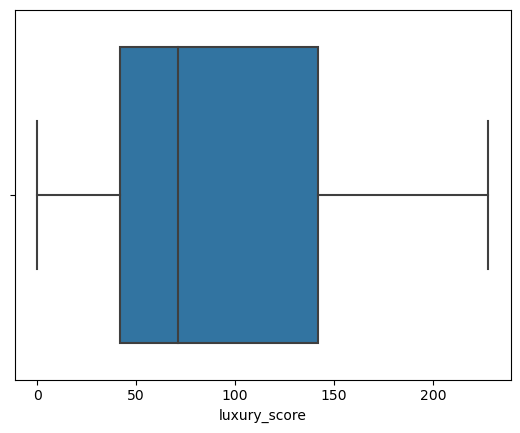

In [491]:
sns.boxplot(x=df['luxury_score'])

In [492]:
df.shape

(3588, 23)

In [493]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'servant room', 'study room', 'pooja room', 'store room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [494]:
df['price_per_sqft']=round(df['price']*10000000/df['area'])

In [495]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
0,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5.0,3.0,2,2.0,East,Old Property,NaN,477.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3.0,3.0,3,1.0,South,Moderately Old,NaN,2250.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,30.0
2,flat,la vida by tata housing,sector 113,2.78,10335.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,4.0,3+,5.0,North-East,Relatively New,2690.0,2350.0,2170.0,1.0,0.0,0.0,0.0,0.0,0.0,220.0
4,house,dlf city plots phase 3,sector 24,1.44,2963.0,4860.0,Plot area 60(50.17 sq.m.),4.0,2.0,2,1.0,NaN,Old Property,NaN,540.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0
5,house,independent,sector 4,0.65,10317.0,630.0,Plot area 70(6.5 sq.m.),1.0,1.0,1,1.0,South-East,Moderately Old,NaN,70.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,21.0


C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

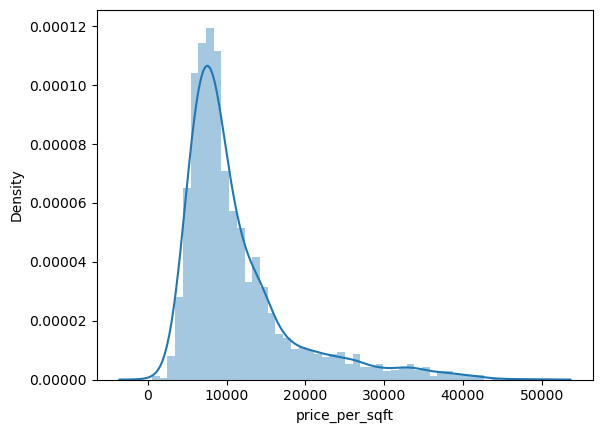

In [496]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

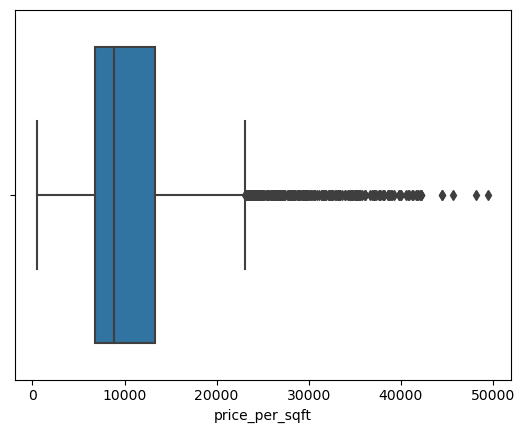

In [497]:
sns.boxplot(x=df['price_per_sqft'])

In [498]:
df[df['price_per_sqft']>42000] 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
884,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1031,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1216,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,1.0,0.0,0.0,2.0,7.0
1295,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,1.0,0.0,1.0,0.0,0.0,2.0,95.0
1592,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,115.0
1772,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,121.0
2479,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,147.0
2640,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,1.0,0.0,1.0,1.0,0.0,2.0,60.0
3616,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,2.0,51.0


In [499]:
x=df[df['price_per_sqft']<=20000]
(x['area']/x['bedRoom']). quantile(0.05)

# is sahi data me sirf 5% values esi hai joo less than 250 hai ratio and ise aur kam ho toh outlier traet kar sakte hai


250.5

In [500]:
df[ df['area']/df['bedRoom'] <250].sample(5) 
# its an issue  

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
1440,flat,laxmi pareena,sector 99a,0.30,6667.0,450.0,Carpet area: 450 (41.81 sq.m.),2.0,1.0,0,12.0,North,Undefined,NaN,NaN,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2769,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1308,flat,signature global solera,sector 107,0.51,7907.0,645.0,Carpet area: 645 (59.92 sq.m.),3.0,2.0,2,9.0,South,Relatively New,NaN,NaN,645.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0
2973,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,1.0,0.0,1.0,2.0,0.0
364,house,palam vihar extension west zone rwa,sector 2,0.40,4444.0,900.0,Plot area 900(83.61 sq.m.),6.0,4.0,2,2.0,West,Moderately Old,NaN,900.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,36.0


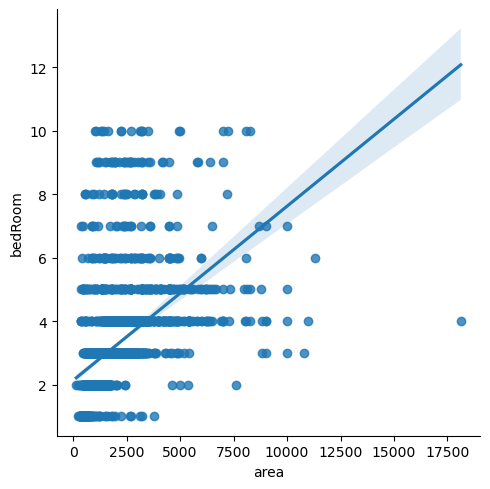

In [501]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [502]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [503]:
(df[df['area_room_ratio']<250])['bedRoom'].value_counts()

2.0     47
3.0     33
5.0     28
4.0     17
6.0     17
9.0     15
8.0     12
7.0      8
10.0     8
Name: bedRoom, dtype: int64

In [504]:
df=df[df['area_room_ratio']>100] 

In [505]:
outliers_df=df[(df['area_room_ratio']<250)& (df['bedRoom']>3)]

In [506]:
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\sk531\AppData\Local\Temp\ipykernel_21368\3359844150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [507]:
outliers_df.shape

(86, 24)

In [508]:
df.update(outliers_df)

In [509]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [510]:
df[(df['area_room_ratio']<250)&(df['bedRoom']>4)] 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
95,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.000000
954,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,48.0,120.600000
1059,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.750000
1156,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,8.0,200.000000
1337,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.000000
2095,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.000000
2284,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.000000
2572,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.666667
2699,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.000000
2769,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.000000


In [511]:
df[(df['area_room_ratio']<250)&(df['bedRoom']>4)].shape

(13, 24)

In [512]:
df.shape

(3568, 24)

In [513]:
df=df[~((df['area_room_ratio']<250)&(df['bedRoom']>4))] 

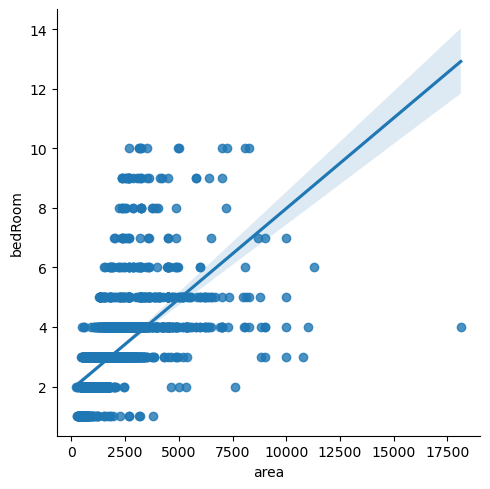

In [514]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [515]:
df.shape

(3555, 24)

In [516]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score,area_room_ratio
1,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3.0,3.0,3,1.0,South,Moderately Old,NaN,2250.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,30.0,750.000000
2,flat,la vida by tata housing,sector 113,2.78,10335.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,4.0,3+,5.0,North-East,Relatively New,2690.0,2350.00,2170.0,1.0,0.0,0.0,0.0,0.0,0.0,220.0,896.666667
4,house,dlf city plots phase 3,sector 24,1.44,2963.0,4860.0,Plot area 60(50.17 sq.m.),4.0,2.0,2,1.0,NaN,Old Property,NaN,540.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1215.000000
5,house,independent,sector 4,0.65,10317.0,630.0,Plot area 70(6.5 sq.m.),1.0,1.0,1,1.0,South-East,Moderately Old,NaN,70.00,NaN,0.0,0.0,0.0,0.0,1.0,0.0,21.0,630.000000
6,flat,experion windchants,sector 112,3.29,11742.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up...,3.0,3.0,3+,2.0,South,Relatively New,2802.0,2225.56,NaN,1.0,0.0,0.0,0.0,0.0,2.0,192.0,934.000000


In [517]:
df.to_csv("gurgaon_properties_outlier_treated.csv",index=False)